In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as s
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle
#sns.set(style = 'whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
df.head(10)


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
#features
# Runs=R, 
#At Bats = AB, 
#Hits=H, 
#Doubles=2B, #Triples=3B, 
#Homeruns=HR, 
#Walks=BB, 
#Strikeouts=SO, 
#Stolen Bases=SB, 
#Runs Allowed=RA, 
#Earned Runs=ER, 
#Earned Run Average=ERA (ERA), 
#Shutouts=SHO, 
#Saves=SV, 
#Complete Games =CG
#Errors=E
#TARGET
#Number of predicted Wins = W

In [4]:
df.shape

(30, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [6]:
#we can see all the columns are int type except ERA which is of float type

In [7]:
df.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [8]:
#we can see there are no null values


In [9]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [10]:
#it is clear from the dataset that it is regression problem

In [11]:
#coming to EDA analysis #visualization

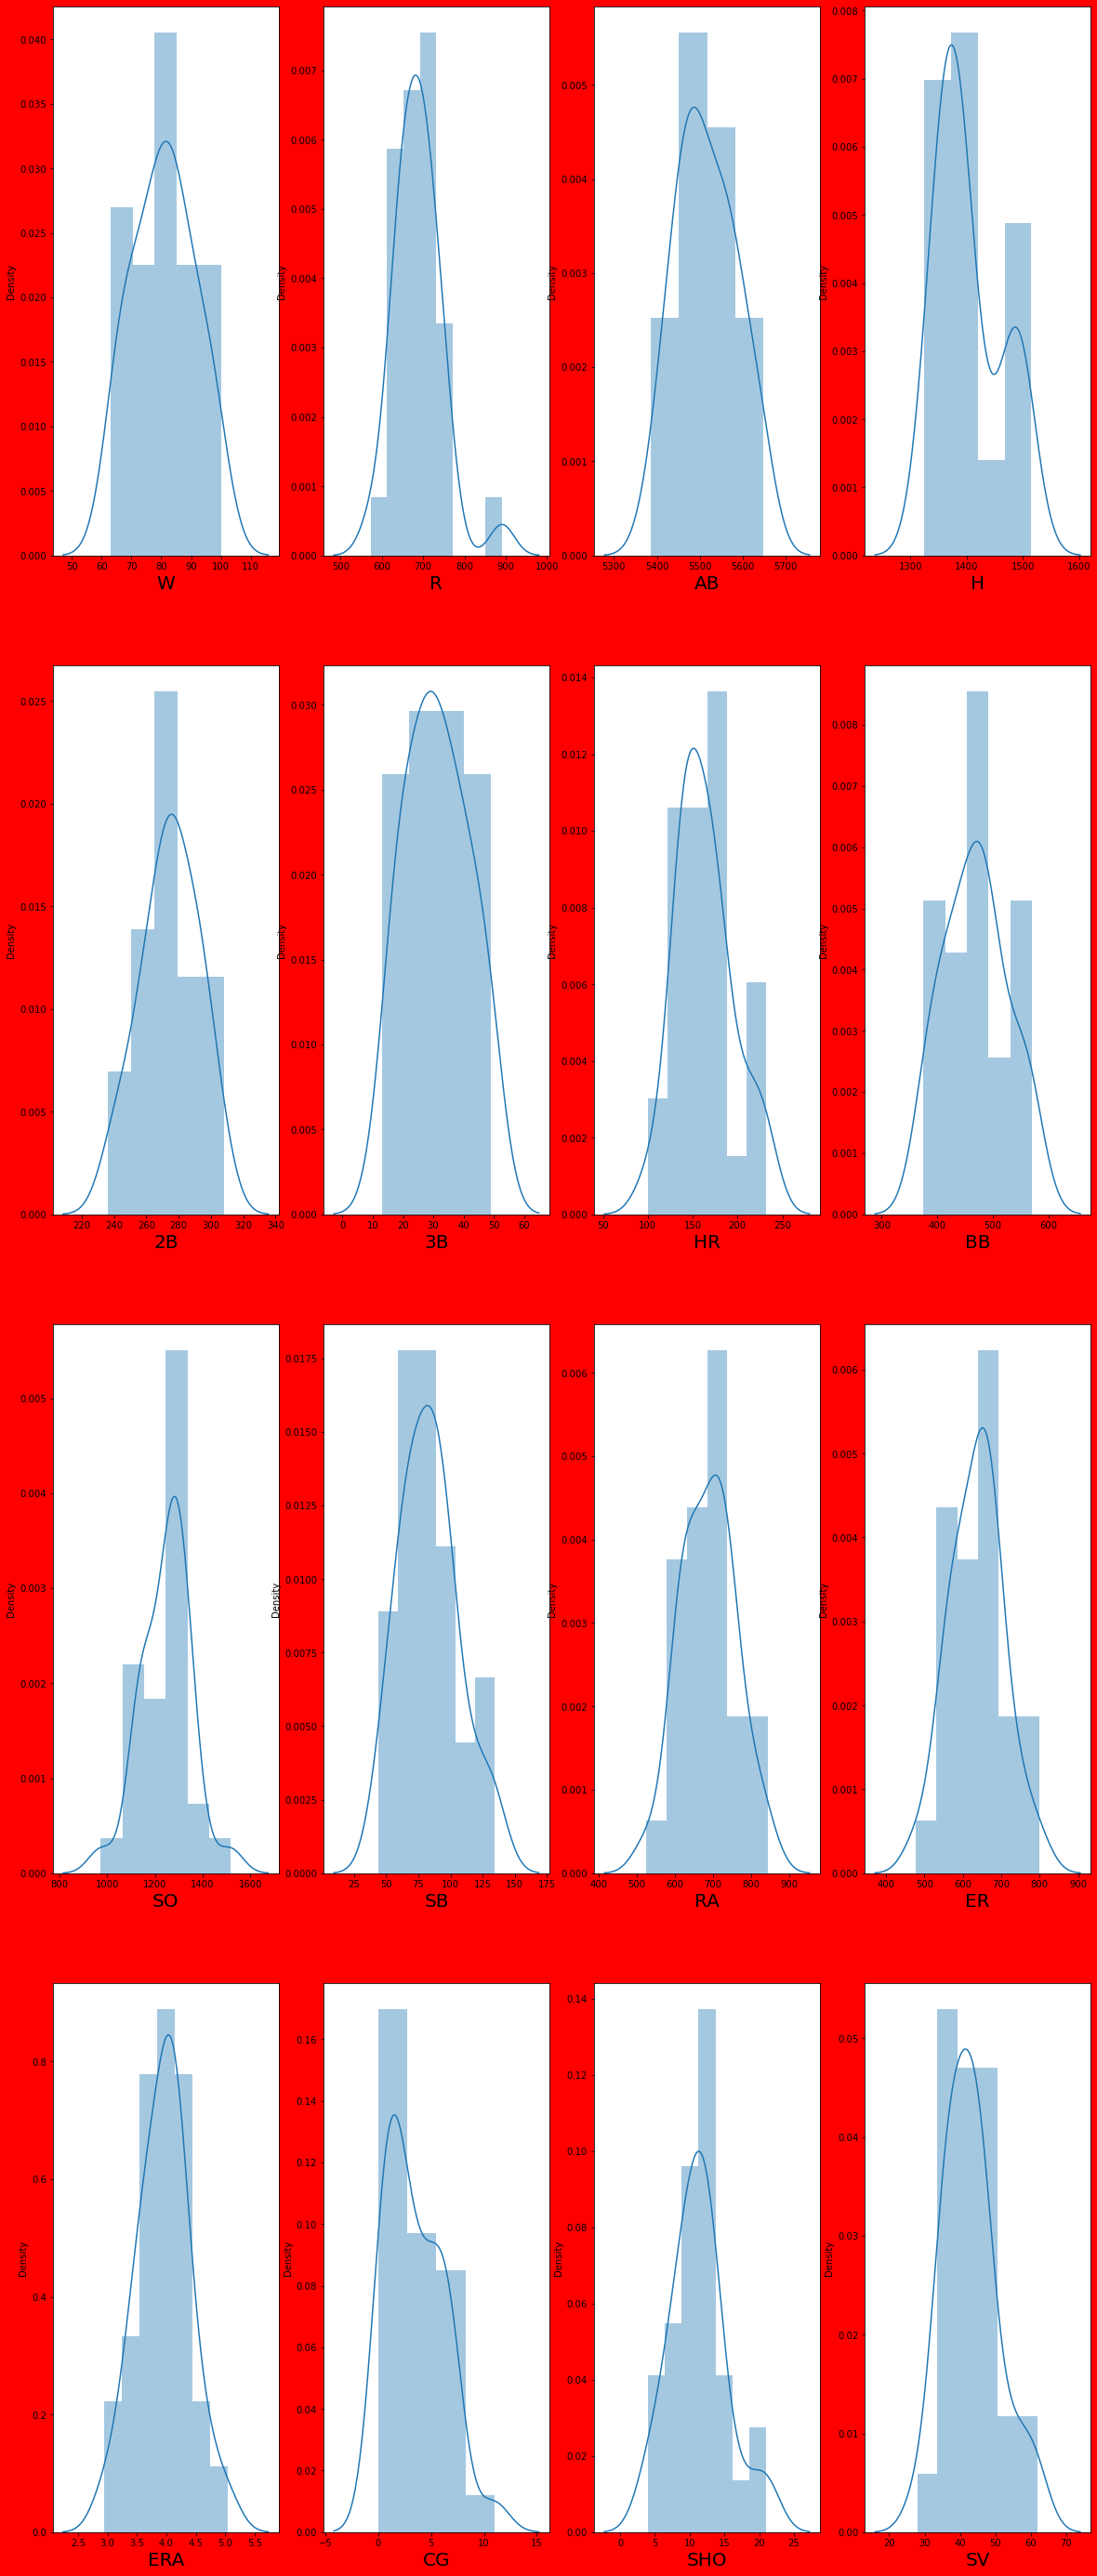

In [12]:
#now let's see how data is distributed for every column

plt.figure(figsize=(20,50),facecolor='red')
plotnumber =1

for column in df :
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

In [13]:
#features are perfectly distributed no problem in that.there is no skewness

In [14]:
#now we will find relationship between independent and dependent variables

In [15]:
#dividing dataset into fetures and label
y=df['W']
X=df.drop(columns=['W'])

In [16]:
y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [17]:
X

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


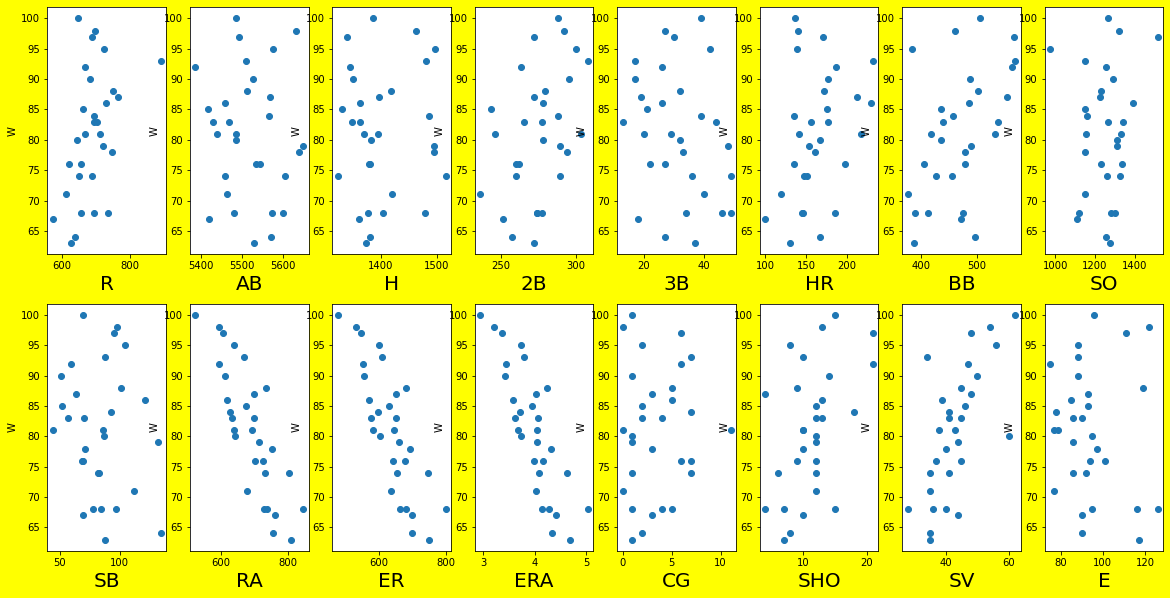

In [18]:
plt.figure(figsize=(20,10),facecolor='yellow')
plotnumber=1


for column in X :
    if plotnumber<=16:
        ax = plt.subplot(2,8,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('W',fontsize=10)
    plotnumber+=1
plt.show()    
    

In [19]:
#Our label and features showing linearnity to some extent. All features are important for model building

In [20]:
#data scaling
scaler =StandardScaler()
X_scaled = scaler.fit_transform(X)



In [21]:
X_scaled

array([[ 0.61907797,  0.84773126,  1.66368512,  1.42017307,  1.04119304,
        -0.7872986 , -1.53490242, -2.69762957,  0.91388329, -0.66623393,
        -0.50511008, -0.50695519, -0.5398062 , -0.81462859,  1.67160651,
        -0.46146963],
       [ 0.13443166, -0.71109353, -0.97068076,  0.12740339,  1.23580856,
        -0.24396668, -0.5365919 ,  0.15487844, -0.60182558,  0.16597077,
         0.24892985,  0.25459752, -0.5398062 ,  0.1728    ,  0.24987932,
        -0.60719689],
       [-0.33290586, -1.1152333 , -0.15189137,  1.58879521, -0.22380785,
        -0.7233772 ,  1.13914361, -0.89398189,  0.11144918, -0.68033909,
        -0.75162313, -0.64134684,  2.77264091, -0.32091429, -0.65485616,
        -1.11724227],
       [-1.14641931,  0.24152162, -0.40108814, -0.82812203, -0.41842337,
        -0.8831807 , -1.16053598, -0.16860185, -0.69098493,  0.18007593,
         0.10392217,  0.05301004,  1.3004422 , -0.56777144, -0.78410408,
         0.48575751],
       [ 0.01327008,  1.28073815,  1

In [22]:
#spliting dataset into train and test data
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size= 0.25,random_state=250)
y_train.head()

3      76
9      78
4      74
15    100
28     74
Name: W, dtype: int64

In [23]:
#model training
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [24]:
#checking r2 score for trained data
lr.score(x_train,y_train)

0.9766821019555652

In [25]:
#checking r2 score for test data
lr.score(x_test,y_test)

-0.3514165478233473

# #our model is not performing upto the mark. seems it is underfitting.

In [26]:
y_pred = lr.predict(x_test)


In [27]:
y_pred

array([78.53125747, 85.11810656, 84.83004854, 78.8917668 , 71.48481412,
       70.27033058, 76.15398902, 86.99462971])

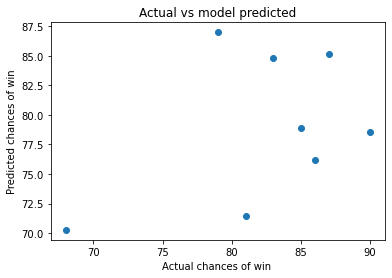

In [28]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual chances of win ')
plt.ylabel('Predicted chances of win')
plt.title('Actual vs model predicted')
plt.show()

In [29]:
#now lets apply some imp metrics to fit our model

In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [31]:
y_pred = lr.predict(x_test)

In [32]:
mean_absolute_error(y_test,y_pred) #mar

6.364384357757171

In [33]:
mean_squared_error(y_test,y_pred) #mse #showing so much of error

54.03554602937415

In [34]:
#importing ridge and lasso model to fit and test our data
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [35]:
lasscv = LassoCV(alphas=None,max_iter = 20, normalize =True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=20, normalize=True)

In [36]:
alpha=lasscv.alpha_ #with 20 iteration it is giving best learning rate at 0.16 or 16
alpha

0.16206111604058324

In [37]:
#now lets fit lasso reg model
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.16206111604058324)

In [38]:
#checking test score
lasso_reg.score(x_test,y_test)

0.7109983677753386

In [39]:
#lasso regression model giving test score 71% which is quite better than before.

In [40]:
#now lets try ridge reg model
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01), normalize=True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [41]:
ridgecv.alpha_ #giving best learning rate

0.09099999999999998

In [42]:
#fitting into ridge model
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)


Ridge(alpha=0.09099999999999998)

In [43]:
#testing score
ridge_model.score(x_test,y_test)

0.2949768499015911

In [44]:
#ridge regreesion model also giving very less test score

conclusion:
    Acc.to our model building it seems Lasso Regression is predicting far better than other models which is 71%
    so going further with lasso model and saving it

In [45]:
#saving the model to the system
pickle.dump(lasscv,open('lasso_reg','wb'))